### Data visualizing and data cleaning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Checking for NULL data

In [ ]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Checking for duplicated data

In [ ]:
df.duplicated().sum()

0

### Number of Churn

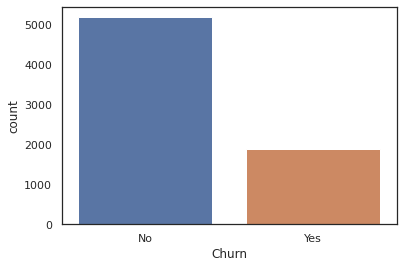

In [ ]:
sns.set(style="white", palette="deep", color_codes=True)
sns.despine(left=True)
sns.countplot(df["Churn"]);

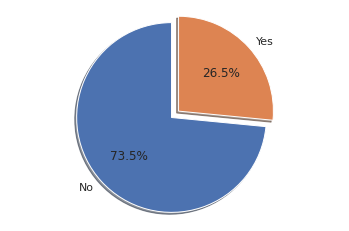

In [ ]:
plt.pie(df["Churn"].value_counts(),explode=(0,0.1), autopct='%1.1f%%',
        shadow=True, startangle=90,labels=df["Churn"].unique())
plt.axis('equal') ;

### Data cleaning

In [ ]:
df.query("TotalCharges == ' '").TotalCharges.count()

11

In [ ]:
df["TotalCharges"] = df["TotalCharges"].replace(" ",np.nan)
df.dropna(inplace = True);

In [ ]:
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [ ]:
df[df["TotalCharges"]<0]["TotalCharges"].count()

0

In [ ]:
tempcoln = [col for col in df.columns if col not in ("customerID","gender","MonthlyCharges","TotalCharges","Churn")]

In [ ]:
tempcoln

['SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [ ]:
for col in tempcoln:
    print("{} : {}".format(col,df[col].unique()))

SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [ ]:
for col in tempcoln:
    if col in ("OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"):
        df[col] = df[col].replace({'No internet service':'No'})

In [ ]:
temptenure = np.array(df["tenure"].tolist())
print("min: {}".format(temptenure.min()))
print("max: {}".format(temp=tenure.max()))

min: 1
max: 72


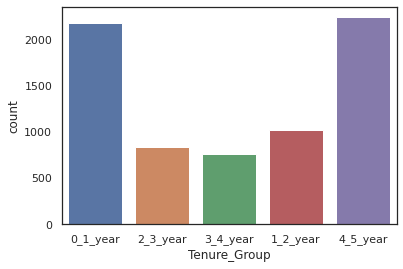

In [ ]:
def tenure_to_group(df):
    if df["tenure"] <=12:
        return "0_1_year"
    elif (df["tenure"] > 12) & (df["tenure"] <= 24 ):
        return "1_2_year"
    elif (df["tenure"] > 24) & (df["tenure"] <= 36) :
        return "2_3_year"
    elif (df["tenure"] > 36) & (df["tenure"] <= 48) :
        return "3_4_year"
    elif df["tenure"] > 48 & (df["tenure"] <= 60):
        return "4_5_year"
    elif df["tenure"] > 60 & (df["tenure"] <= 72):
        return "5_6_year"
df["Tenure_Group"] = df.apply(lambda df:tenure_to_group(df),axis = 1)
sns.countplot(df["Tenure_Group"]);

### Visualization

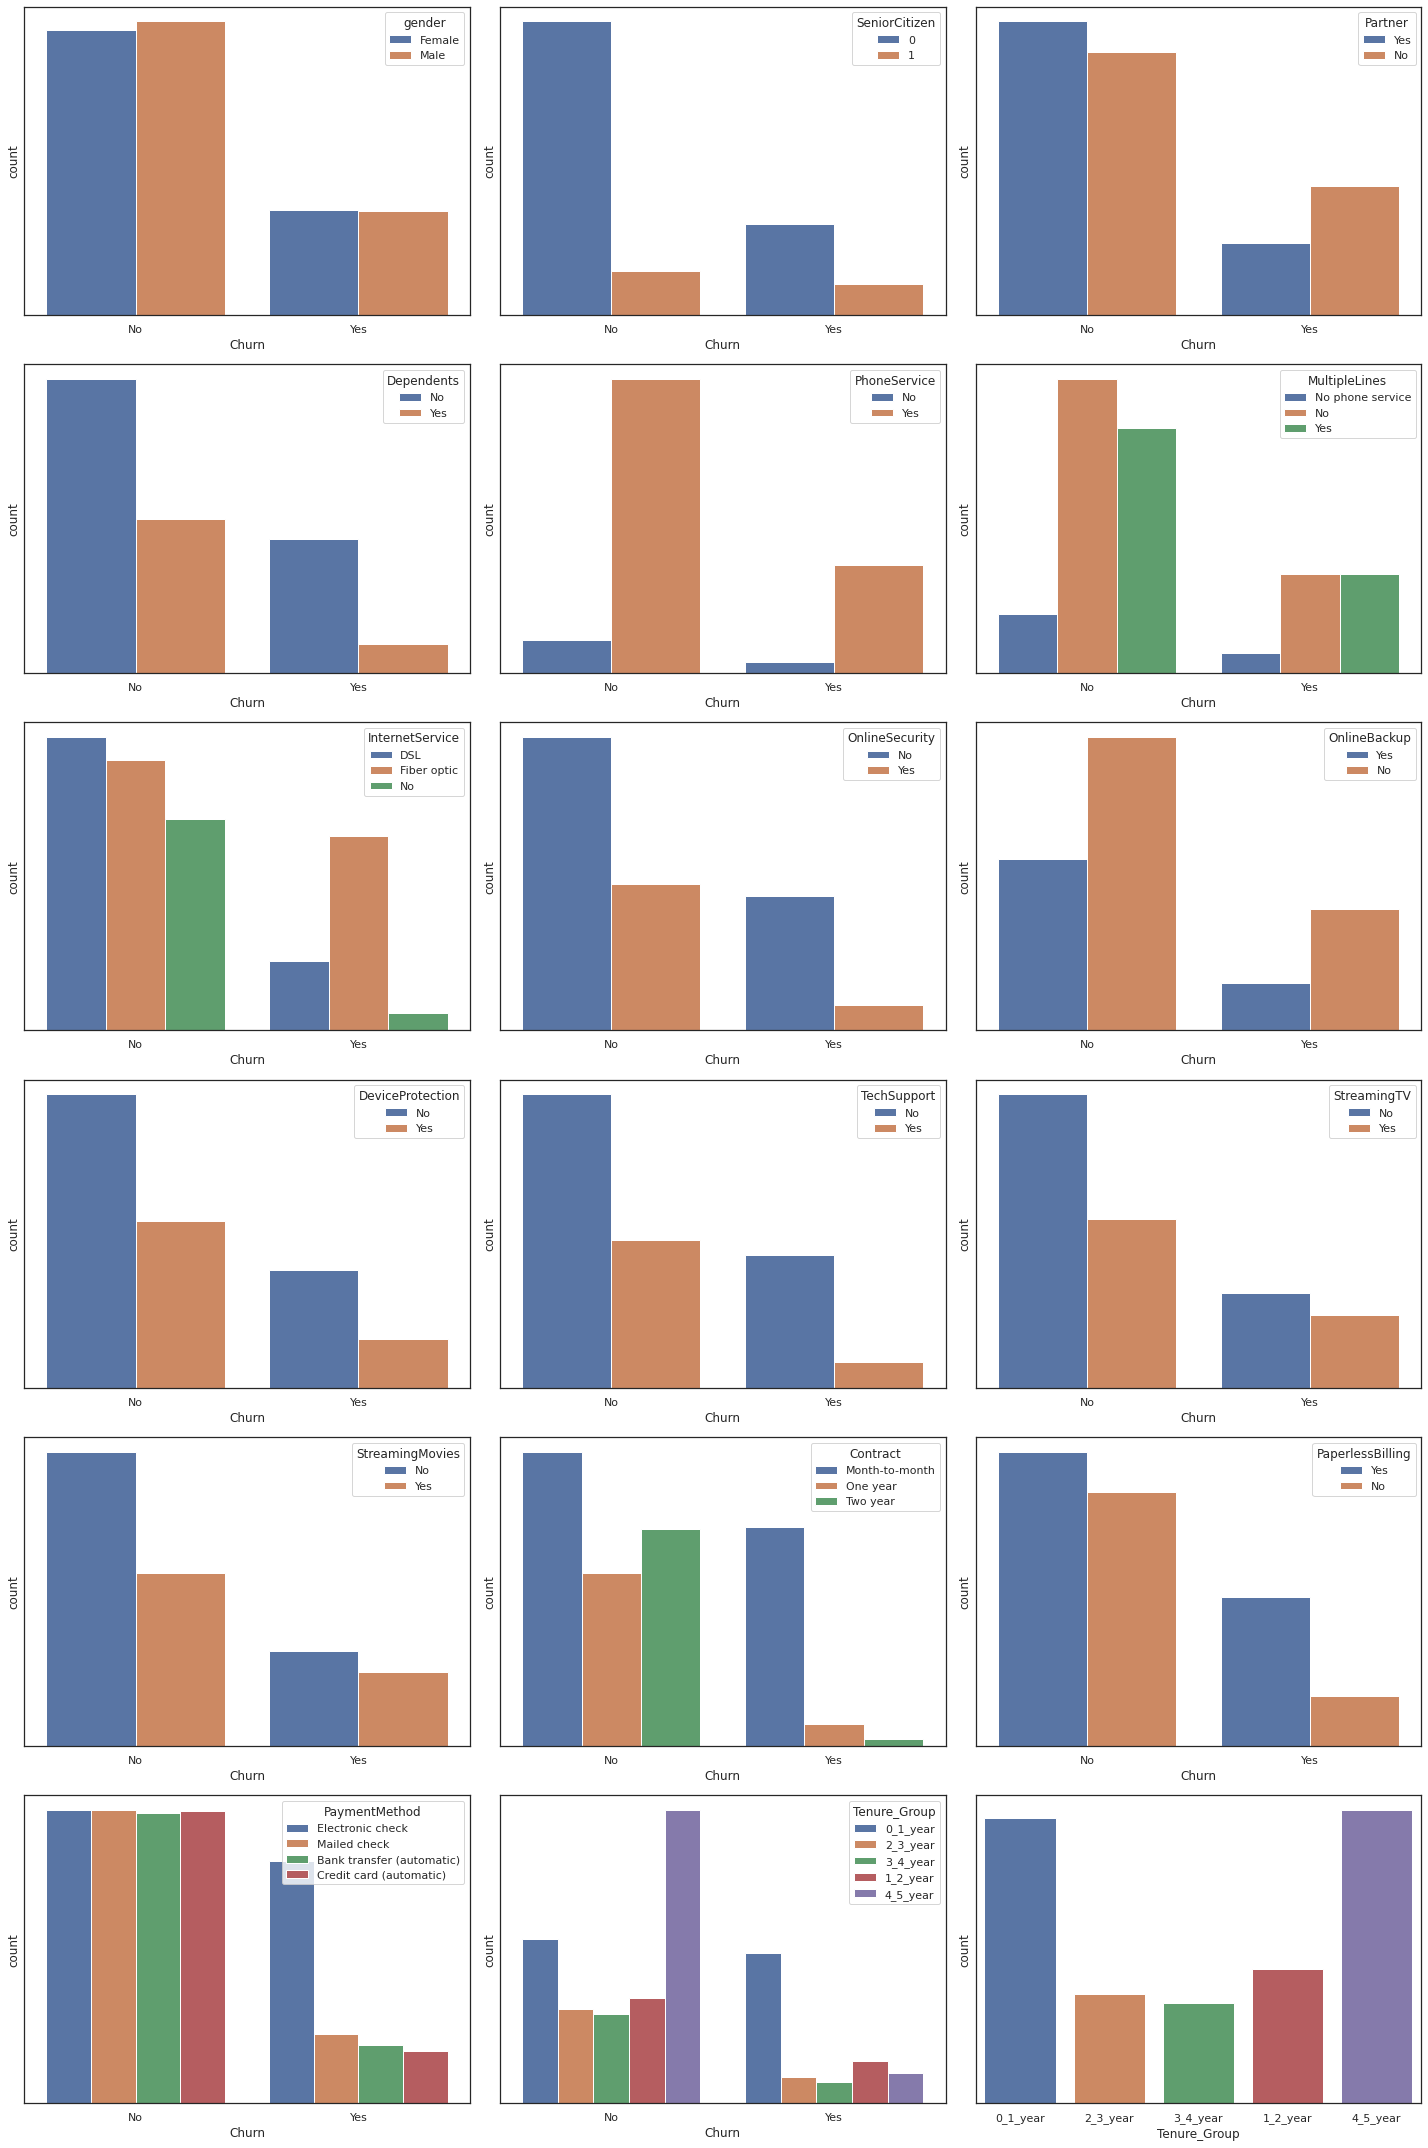

In [ ]:
f, axes = plt.subplots(nrows=6, ncols=3, figsize=(20, 30))

sns.countplot(df["Churn"],hue = df["gender"],ax = axes[0,0])
sns.countplot(df["Churn"],hue = df["SeniorCitizen"],ax = axes[0,1])
sns.countplot(df["Churn"],hue = df["Partner"],ax = axes[0,2])
sns.countplot(df["Churn"],hue = df["Dependents"],ax = axes[1,0])
sns.countplot(df["Churn"],hue = df["PhoneService"],ax = axes[1,1])
sns.countplot(df["Churn"],hue = df["MultipleLines"],ax = axes[1,2])
sns.countplot(df["Churn"],hue = df["InternetService"],ax = axes[2,0])
sns.countplot(df["Churn"],hue = df["OnlineSecurity"],ax = axes[2,1])
sns.countplot(df["Churn"],hue = df["OnlineBackup"],ax = axes[2,2])
sns.countplot(df["Churn"],hue = df["DeviceProtection"],ax = axes[3,0])
sns.countplot(df["Churn"],hue = df["TechSupport"],ax = axes[3,1])
sns.countplot(df["Churn"],hue = df["StreamingTV"],ax = axes[3,2])
sns.countplot(df["Churn"],hue = df["StreamingMovies"],ax = axes[4,0])
sns.countplot(df["Churn"],hue = df["Contract"],ax = axes[4,1])
sns.countplot(df["Churn"],hue = df["PaperlessBilling"],ax = axes[4,2])
sns.countplot(df["Churn"],hue = df["PaymentMethod"],ax = axes[5,0])
sns.countplot(df["Churn"],hue = df["Tenure_Group"],ax = axes[5,1])
sns.countplot(df["Tenure_Group"],ax = axes[5,2]);

plt.setp(axes, yticks=[])
plt.tight_layout()

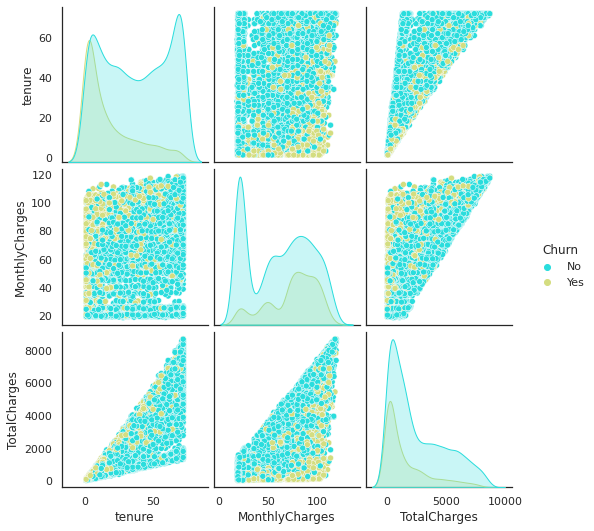

In [ ]:
tempcols = df.drop("SeniorCitizen",axis = 1)
sns.pairplot(tempcols,hue='Churn',palette='rainbow')

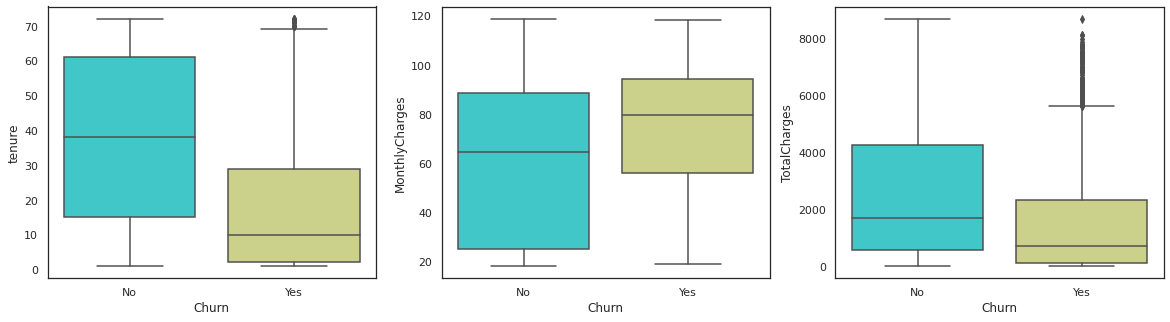

In [ ]:
f, axes = plt.subplots( ncols=3, figsize=(20, 5))
sns.boxplot(x="Churn", y="tenure", data=df,palette='rainbow',ax = axes[0]);
sns.boxplot(x="Churn", y="MonthlyCharges", data=df,palette='rainbow',ax = axes[1])
sns.boxplot(x="Churn", y="TotalCharges", data=df,palette='rainbow',ax = axes[2])

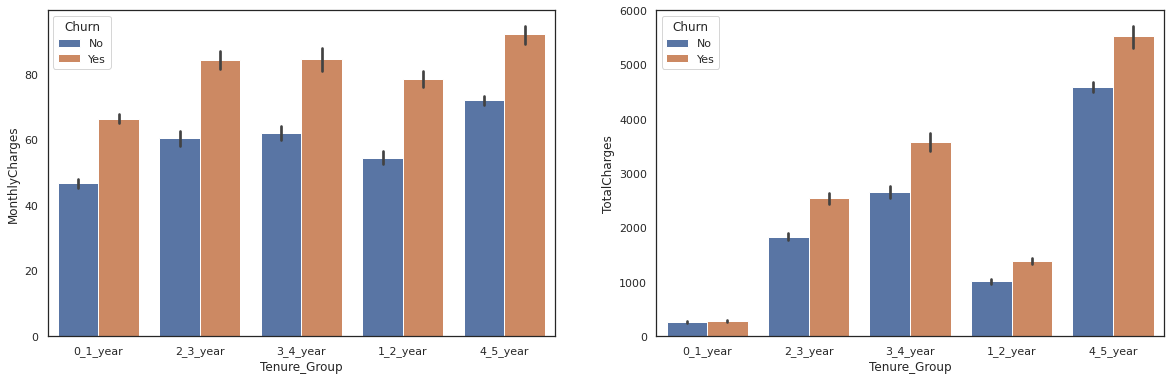

In [ ]:
f, axes = plt.subplots( ncols=2, figsize=(20, 6))
sns.barplot(x='Tenure_Group',y='MonthlyCharges',data=df,hue = "Churn",ax = axes[0])
sns.barplot(x='Tenure_Group',y='TotalCharges',data=df,hue = "Churn",ax = axes[1])

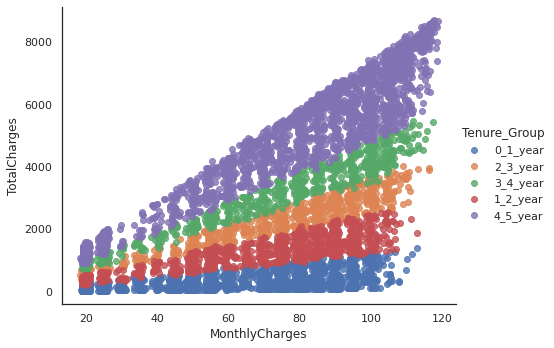

In [ ]:
sns.lmplot(x = "MonthlyCharges", y= "TotalCharges", data=df,fit_reg = False,hue = "Tenure_Group",aspect=12/9);

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


### Data preprocessing

In [ ]:
catcols = [x for x in df.columns if df[x].nunique()<6 and x!="Churn"]
numcols = [x for x in df.columns if df[x].nunique()>6 and x!="customerID"]
idcustomer = df["customerID"]
label = df




["Churn"]
label = label.apply(lambda x: 1 if x == "Yes" else 0)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

featureslogtransformed = pd.DataFrame(data = df[numcols])
featureslogtransformed[numcols] = df[numcols].apply(lambda x: np.log(x + 1))

scaler = MinMaxScaler()
featureslogminmaxtransform = pd.DataFrame(data = featureslogtransformed)
featureslogminmaxtransform[numcols] = scaler.fit_transform(featureslogtransformed[numcols])

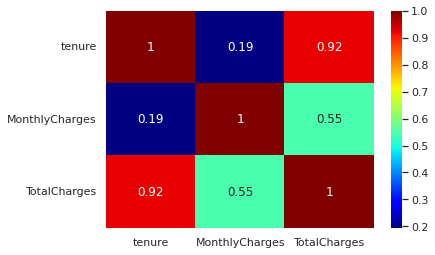

In [ ]:
sns.heatmap(features_log_minmax_transform.corr(),annot=True,cmap='jet');

In [ ]:
features_log_minmax_transform.drop("tenure",inplace = True, axis = 1)

In [ ]:
df.drop(["MonthlyCharges","TotalCharges","tenure"],axis = 1, inplace = True)
data = pd.concat([data, features_log_minmax_transform], axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Churn               0
Tenure_Group        0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [ ]:
data.drop("Churn",inplace = True, axis = 1)
data.drop("customerID",inplace = True, axis = 1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   PhoneService      7032 non-null   object 
 5   MultipleLines     7032 non-null   object 
 6   InternetService   7032 non-null   object 
 7   OnlineSecurity    7032 non-null   object 
 8   OnlineBackup      7032 non-null   object 
 9   DeviceProtection  7032 non-null   object 
 10  TechSupport       7032 non-null   object 
 11  StreamingTV       7032 non-null   object 
 12  StreamingMovies   7032 non-null   object 
 13  Contract          7032 non-null   object 
 14  PaperlessBilling  7032 non-null   object 
 15  PaymentMethod     7032 non-null   object 
 16  Tenure_Group      7032 non-null   object 


In [ ]:
data = pd.get_dummies(data = data,columns = cat_cols)

In [ ]:
data.head()

,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure_Group_0_1_year,Tenure_Group_1_2_year,Tenure_Group_2_3_year,Tenure_Group_3_4_year,Tenure_Group_4_5_year
0,0.258016,0.072892,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0
1,0.602917,0.749358,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0
2,0.572840,0.280590,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0
3,0.443484,0.745063,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0
4,0.719396,0.335724,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0


In [ ]:
dataoriginal = pd.concat([data, label,id_customer], axis=1)

In [ ]:
dataoriginal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   MonthlyCharges                           7032 non-null   float64
 1   TotalCharges                             7032 non-null   float64
 2   gender_Female                            7032 non-null   uint8  
 3   gender_Male                              7032 non-null   uint8  
 4   SeniorCitizen_0                          7032 non-null   uint8  
 5   SeniorCitizen_1                          7032 non-null   uint8  
 6   Partner_No                               7032 non-null   uint8  
 7   Partner_Yes                              7032 non-null   uint8  
 8   Dependents_No                            7032 non-null   uint8  
 9   Dependents_Yes                           7032 non-null   uint8  
 10  PhoneService_No                          7032 no

In [ ]:
dataoriginal.head()

,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure_Group_0_1_year,Tenure_Group_1_2_year,Tenure_Group_2_3_year,Tenure_Group_3_4_year,Tenure_Group_4_5_year,Churn,customerID
0,0.258016,0.072892,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,7590-VHVEG
1,0.602917,0.749358,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,5575-GNVDE
2,0.572840,0.280590,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,3668-QPYBK
3,0.443484,0.745063,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,7795-CFOCW
4,0.719396,0.335724,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,9237-HQITU


### Evaluate Algorithms

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.3, random_state = 42)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 4922 samples.
Testing set has 2110 samples.


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve

def apply_classifier(clf,xTrain,xTest,yTrain,yTest):
    
    clf.fit(xTrain, yTrain)
    predictions = clf.predict(xTest)
    conf_mtx = confusion_matrix(yTest,predictions)
    f, axes = plt.subplots(ncols=2, figsize=(15, 5))
    sns.heatmap(conf_mtx,annot=True,cmap='tab20c',cbar = False,fmt = "g",ax = axes[0])
    axes[0].set_xlabel('Predicted labels')
    axes[0].set_ylabel('True labels')
    axes[0].set_title('Confusion Matrix'); 
    axes[0].xaxis.set_ticklabels(['Not Churn', 'Churn']);
    axes[0].yaxis.set_ticklabels(['Not Churn', 'Churn']);

    print("\n Classification report : \n {}".format(classification_report(yTest,predictions)))
    
    roc_auc = roc_auc_score(yTest,predictions) 
    print ("Area under ROC curve : ",roc_auc,"\n")

    fpr, tpr,_ = roc_curve(yTest, predictions)
    axes[1].plot(fpr,tpr,label= "auc="+str(roc_auc));
    axes[1].plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")





 Classification report : 
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      1549
           1       0.66      0.44      0.53       561

    accuracy                           0.79      2110
   macro avg       0.74      0.68      0.70      2110
weighted avg       0.78      0.79      0.78      2110

Area under ROC curve :  0.6803624671888828 



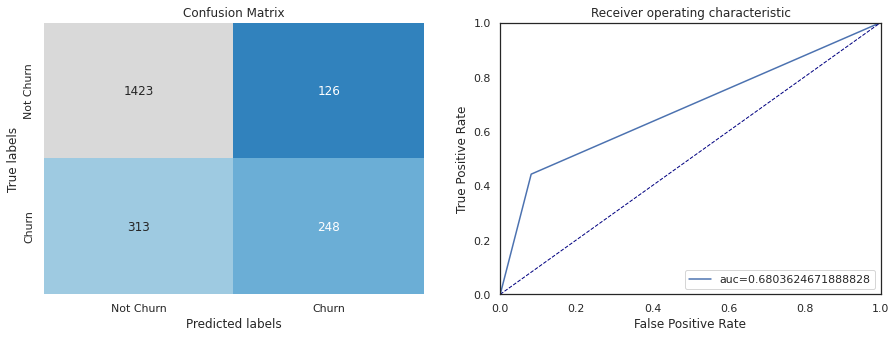

In [ ]:
svmmodel = SVC(random_state = 42)
apply_classifier(svmmodel,X_train, X_test, y_train, y_test)


 Classification report : 
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.65      0.52      0.58       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110

Area under ROC curve :  0.7090032209843852 



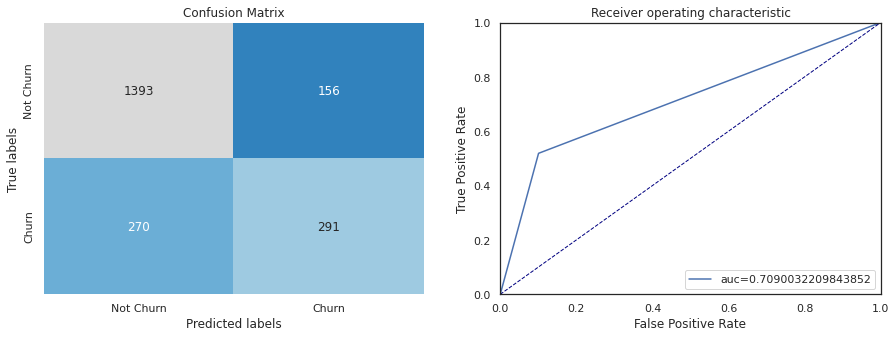

In [ ]:
logisticreg = LogisticRegression(random_state = 42)
apply_classifier(logisticreg,X_train, X_test, y_train, y_test)


 Classification report : 
               precision    recall  f1-score   support

           0       0.82      0.81      0.81      1549
           1       0.49      0.52      0.50       561

    accuracy                           0.73      2110
   macro avg       0.66      0.66      0.66      2110
weighted avg       0.73      0.73      0.73      2110

Area under ROC curve :  0.6621988310553988 



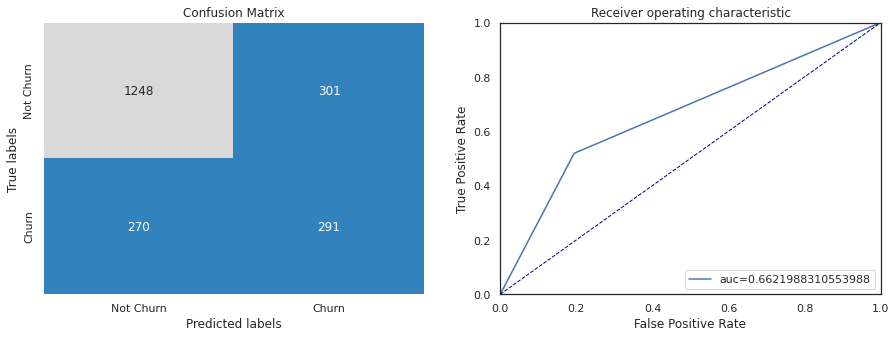

In [ ]:
decisiontree = DecisionTreeClassifier(random_state = 42);
apply_classifier(decisiontree,X_train, X_test, y_train, y_test)


 Classification report : 
               precision    recall  f1-score   support

           0       0.83      0.90      0.87      1549
           1       0.65      0.50      0.57       561

    accuracy                           0.80      2110
   macro avg       0.74      0.70      0.72      2110
weighted avg       0.79      0.80      0.79      2110

Area under ROC curve :  0.7034870406875116 



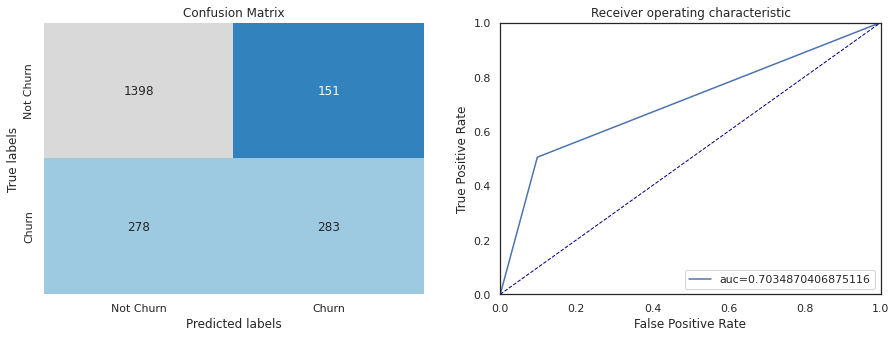

In [ ]:
xgboost = XGBClassifier(random_state = 42)
apply_classifier(xgboost,X_train, X_test, y_train, y_test)


 Classification report : 
               precision    recall  f1-score   support

           0       0.82      0.89      0.86      1549
           1       0.62      0.47      0.53       561

    accuracy                           0.78      2110
   macro avg       0.72      0.68      0.70      2110
weighted avg       0.77      0.78      0.77      2110

Area under ROC curve :  0.6829252153939808 



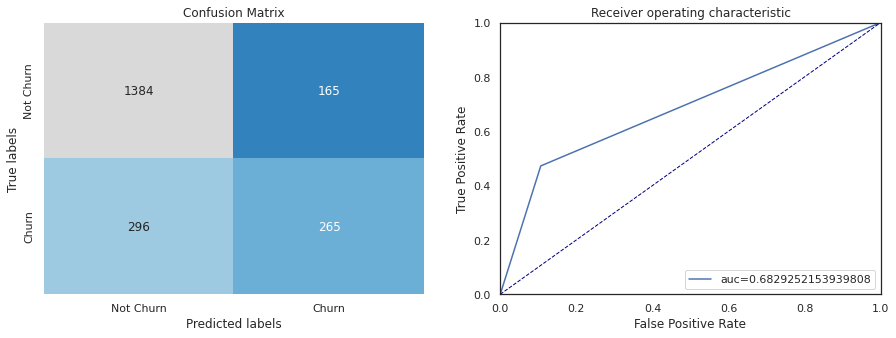

In [ ]:
randomforest = RandomForestClassifier(random_state = 42)
apply_classifier(randomforest,X_train, X_test, y_train, y_test)

### Tuning Parameters

In [ ]:
Tree_param = {"max_depth": [3,4,5,6],
                   "min_samples_leaf":[1,2,3,4]}

LogReg_param = {
    "C":[0.25,0.5,0.75,1.0,1.5,2.0,2.5,3.0,4.0,10.0],
    "solver":["newton-cg", "lbfgs", "sag", "saga"],
    "tol":[0.01,0.001,0.0001,0.00001],
    "warm_start":["True","False"]}

SVM_param = {
    "C":[1.0,2.0,3.0],
    "cache_size":[100,200],
    "decision_function_shape":['ovo','ovr'],
    "kernel":['sigmoid',"linear"],
    "tol":[0.001,0.0001]}

RandomForest_param = {
    "n_estimators" :[10,15,20,25,30], 
    "criterion": ["entropy","gini"],
    "max_depth" : [5,10,15],
    "min_samples_split":[2,4,8,16],
    "max_features":["sqrt","auto","log2"],
    "class_weight" : ["balanced_subsample","balanced"]}

Xgboost_param = {"max_depth" : [3,4,5,6],
    "learning_rate" : [0.001,0.0001],
    "booster" : ["gbtree","gblinear","dart"],
    "min_child_weight" : [1,2,3,4]
                     
                     }


In [ ]:
from sklearn.model_selection import GridSearchCV

def grid_search(clf,parameters,xTrain,Ytrain):
    
    
    grid_obj = GridSearchCV(clf,parameters,scoring = 'roc_auc',cv = 5)
    grid_fit = grid_obj.fit(xTrain,Ytrain)
    best_clf = grid_fit.best_estimator_

    return best_clf




 Classification report : 
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1549
           1       0.67      0.47      0.55       561

    accuracy                           0.80      2110
   macro avg       0.75      0.69      0.71      2110
weighted avg       0.78      0.80      0.78      2110

Area under ROC curve :  0.6909805532636202 



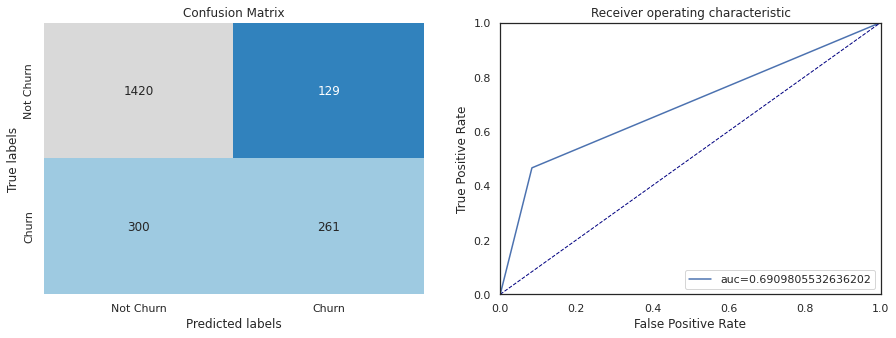

In [ ]:
svm_grid = grid_search(svmmodel,SVM_param,X_train,y_train);
apply_classifier(svm_grid,X_train, X_test, y_train, y_test)


 Classification report : 
               precision    recall  f1-score   support

           0       0.83      0.90      0.87      1549
           1       0.65      0.50      0.57       561

    accuracy                           0.80      2110
   macro avg       0.74      0.70      0.72      2110
weighted avg       0.79      0.80      0.79      2110

Area under ROC curve :  0.7032413528824876 



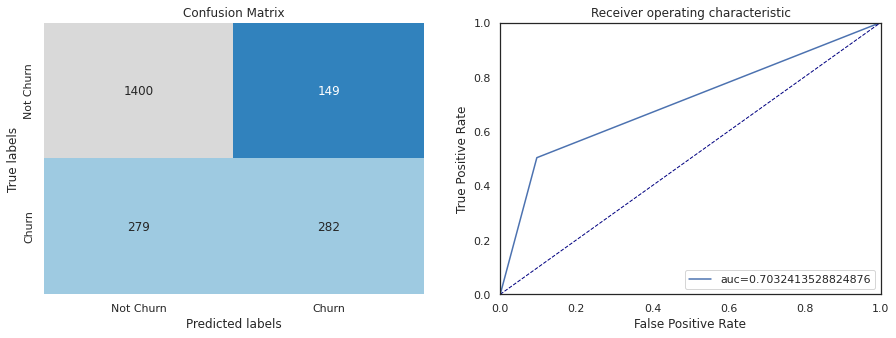

In [ ]:
logReg_grid = grid_search(logisticreg,LogReg_param,X_train,y_train);
apply_classifier(logReg_grid,X_train, X_test, y_train, y_test)


 Classification report : 
               precision    recall  f1-score   support

           0       0.91      0.72      0.80      1549
           1       0.51      0.80      0.62       561

    accuracy                           0.74      2110
   macro avg       0.71      0.76      0.71      2110
weighted avg       0.80      0.74      0.76      2110

Area under ROC curve :  0.7621931923188902 



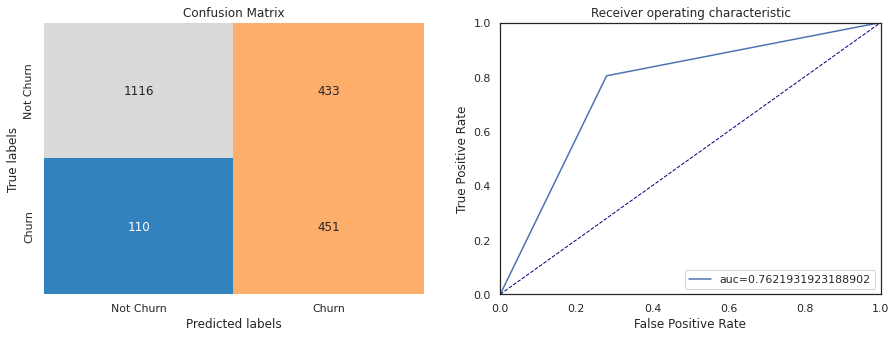

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(base_estimator = randomForestgrid, n_estimators = 4)
apply_classifier(model,X_train, X_test, y_train, y_test)


 Classification report : 
               precision    recall  f1-score   support

           0       0.90      0.72      0.80      1549
           1       0.50      0.79      0.61       561

    accuracy                           0.74      2110
   macro avg       0.70      0.75      0.71      2110
weighted avg       0.80      0.74      0.75      2110

Area under ROC curve :  0.7529577474513487 



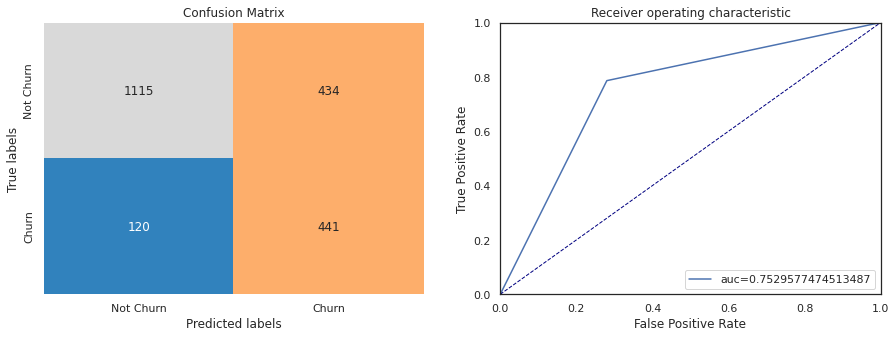

In [ ]:
randomForest_grid = grid_search(randomforest,RandomForest_param,X_train,y_train);
apply_classifier(randomForest_grid,X_train, X_test, y_train, y_test)


 Classification report : 
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1549
           1       0.61      0.53      0.56       561

    accuracy                           0.78      2110
   macro avg       0.72      0.70      0.71      2110
weighted avg       0.78      0.78      0.78      2110

Area under ROC curve :  0.70159346090687 



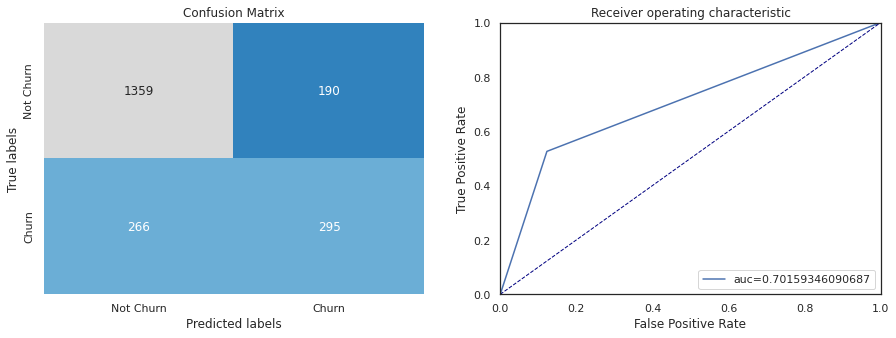

In [ ]:
xgBoost_grid = grid_search(xgboost,Xgboost_param,X_train,y_train);
apply_classifier(xgBoost_grid,X_train, X_test, y_train, y_test)


 Classification report : 
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      1549
           1       0.56      0.64      0.60       561

    accuracy                           0.77      2110
   macro avg       0.71      0.73      0.72      2110
weighted avg       0.78      0.77      0.78      2110

Area under ROC curve :  0.7296605595697989 



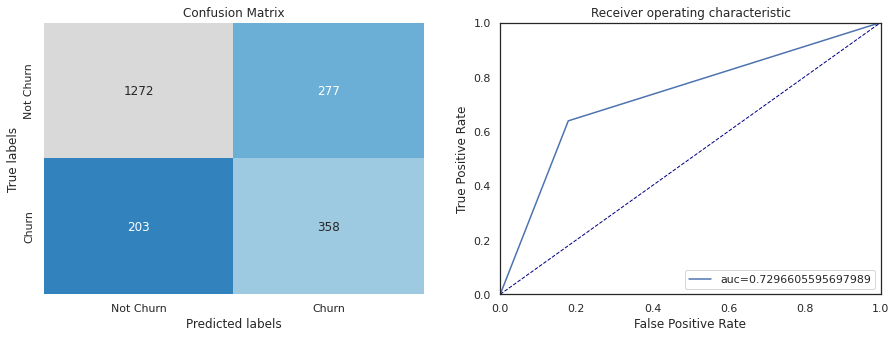

In [ ]:
tree_grid = grid_search(decisiontree,Tree_param,X_train,y_train);
apply_classifier(tree_grid,X_train, X_test, y_train, y_test)

### Upsampling

In [ ]:
from sklearn.utils import resample

upsampledata = dataoriginal

majority = upsampledata[upsampledata["Churn"]==0]
minority = upsampledata[upsampledata["Churn"]==1]

minority_upsampled = resample(minority, replace=True, n_samples=5163,random_state=42) 
del(upsampledata)
upsampledata = pd.concat([majority,minority_upsampled])

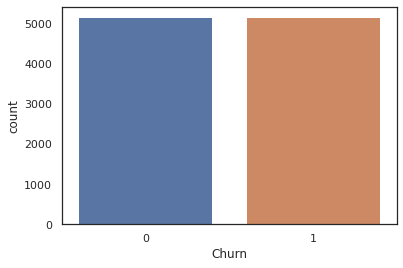

In [ ]:
sns.countplot(upsample_data["Churn"]);

In [ ]:
id_customer_upsample = upsampledata["customerID"]
label_upsample = upsampledata["Churn"]
upsampledata.drop("Churn",inplace = True, axis = 1)
upsampledata.drop("customerID",inplace = True, axis = 1)

In [ ]:
# from sklearn.cross_validation import train_test_split

X_train_upS, X_test_upS, y_train_upS, y_test_upS = train_test_split(upsampledata, label_upsample, test_size = 0.3, random_state = 42)

print("Training set has {} samples.".format(X_train_upS.shape[0]))
print("Testing set has {} samples.".format(X_test_upS.shape[0]))

Training set has 7228 samples.
Testing set has 3098 samples.



 Classification report : 
               precision    recall  f1-score   support

           0       0.95      0.83      0.89      1571
           1       0.85      0.95      0.90      1527

    accuracy                           0.89      3098
   macro avg       0.90      0.89      0.89      3098
weighted avg       0.90      0.89      0.89      3098

Area under ROC curve :  0.8914191278814565 



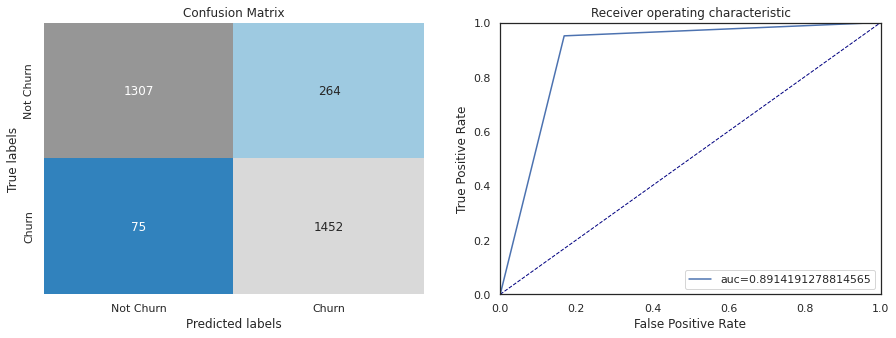

In [ ]:
random_forest = RandomForestClassifier(random_state = 42)
apply_classifier(random_forest,X_train_upS, X_test_upS, y_train_upS, y_test_upS)


 Classification report : 
               precision    recall  f1-score   support

           0       0.80      0.73      0.76      1571
           1       0.74      0.81      0.78      1527

    accuracy                           0.77      3098
   macro avg       0.77      0.77      0.77      3098
weighted avg       0.77      0.77      0.77      3098

Area under ROC curve :  0.7691693793490979 



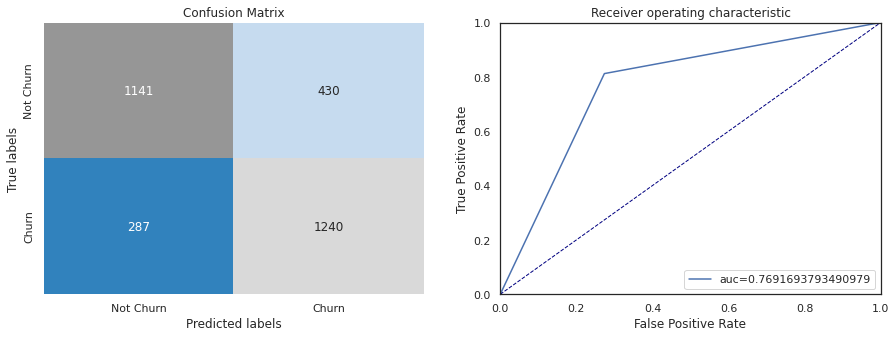

In [ ]:
logistic_reg = LogisticRegression(random_state = 42)
apply_classifier(logistic_reg,X_train_upS, X_test_upS, y_train_upS, y_test_upS)


 Classification report : 
               precision    recall  f1-score   support

           0       0.92      0.80      0.86      1571
           1       0.82      0.93      0.87      1527

    accuracy                           0.87      3098
   macro avg       0.87      0.87      0.86      3098
weighted avg       0.87      0.87      0.86      3098

Area under ROC curve :  0.8663465638869541 



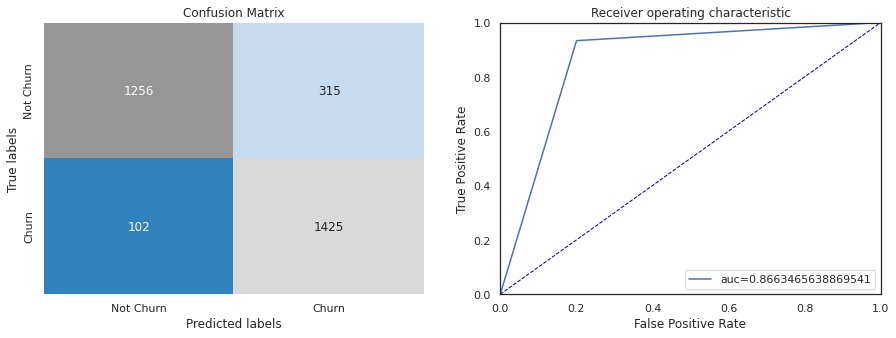

In [ ]:
decision_tree = DecisionTreeClassifier(random_state = 42);
apply_classifier(decision_tree,X_train_upS, X_test_upS, y_train_upS, y_test_upS)


 Classification report : 
               precision    recall  f1-score   support

           0       0.95      0.84      0.89      1571
           1       0.85      0.95      0.90      1527

    accuracy                           0.90      3098
   macro avg       0.90      0.90      0.90      3098
weighted avg       0.90      0.90      0.90      3098

Area under ROC curve :  0.8978303542807026 



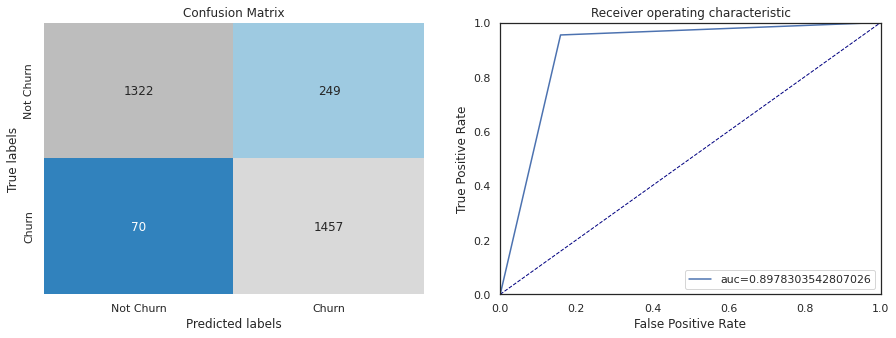

In [ ]:
model = AdaBoostClassifier(base_estimator = random_forest, n_estimators = 4)
apply_classifier(model,X_train_upS, X_test_upS, y_train_upS, y_test_upS)


 Classification report : 
               precision    recall  f1-score   support

           0       0.83      0.75      0.79      1571
           1       0.76      0.84      0.80      1527

    accuracy                           0.79      3098
   macro avg       0.80      0.79      0.79      3098
weighted avg       0.80      0.79      0.79      3098

Area under ROC curve :  0.7940612367997727 



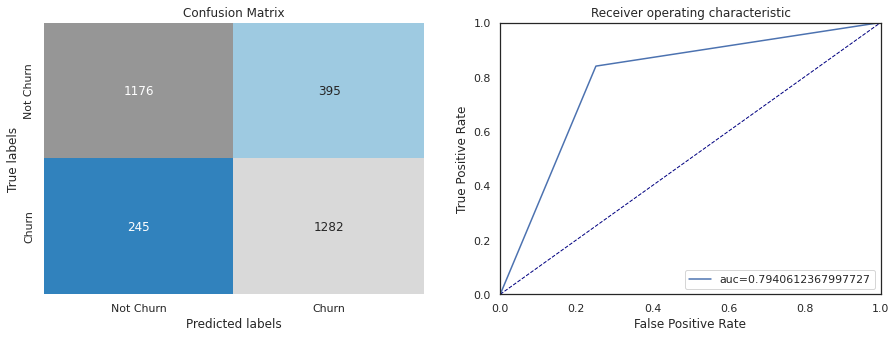

In [ ]:
svm_model = SVC(random_state = 42)
apply_classifier(svm_model,X_train_upS, X_test_upS, y_train_upS, y_test_upS)


 Classification report : 
               precision    recall  f1-score   support

           0       0.81      0.74      0.77      1571
           1       0.76      0.82      0.79      1527

    accuracy                           0.78      3098
   macro avg       0.78      0.78      0.78      3098
weighted avg       0.78      0.78      0.78      3098

Area under ROC curve :  0.7820560277825368 



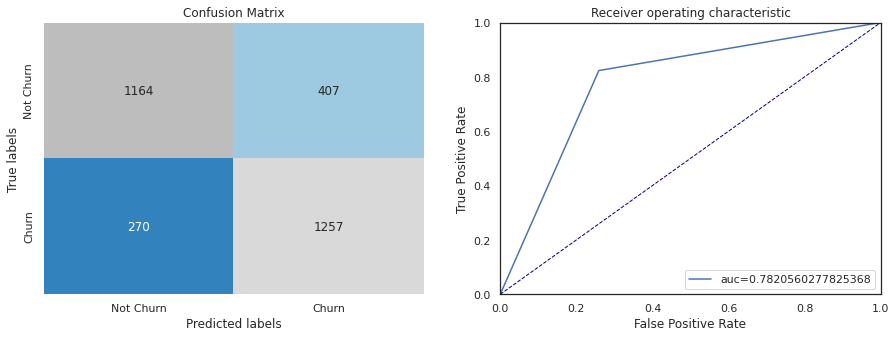

In [ ]:
xg_boost = XGBClassifier(random_state = 42)
apply_classifier(xg_boost,X_train_upS, X_test_upS, y_train_upS, y_test_upS)

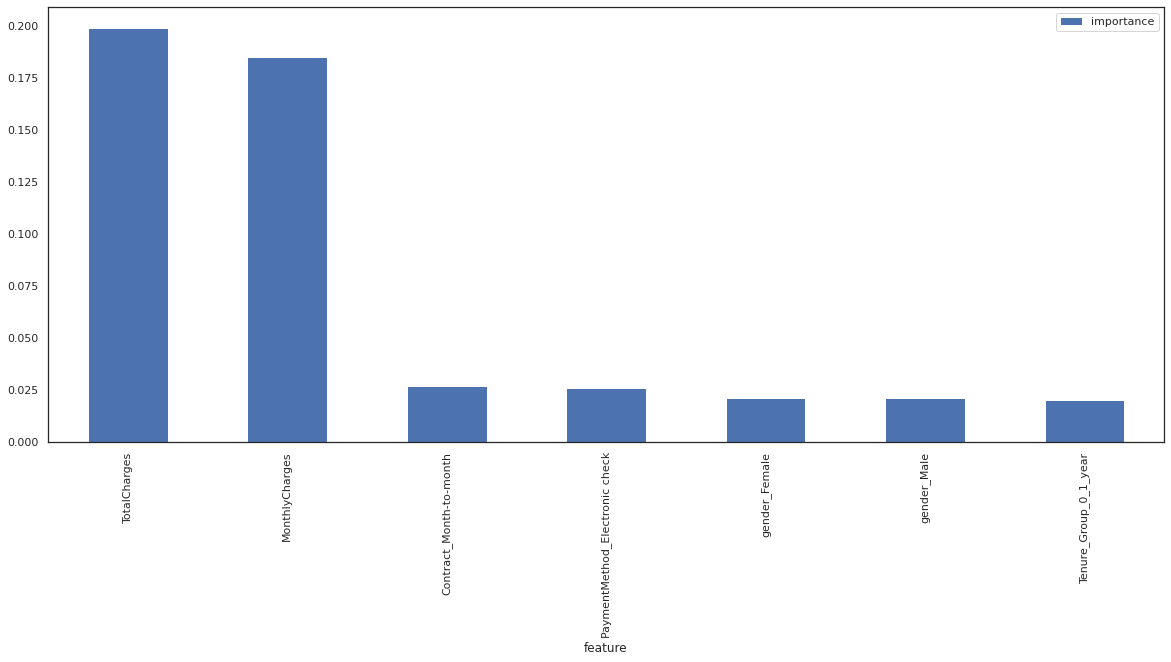

In [ ]:
importances = pd.DataFrame({'feature':data.columns,'importance':np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances[0:7].plot.bar(figsize=(20, 8))

# **Saving The Model**

In [ ]:
import pickle

In [ ]:
# Save the trained model as a pickle string.
saved_model = pickle.dumps(model)
 
# Load the pickled model
ada_from_pickle = pickle.loads(saved_model)
 
# Use the loaded pickled model to make predictions
ada_from_pickle.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0])